## Engenharia de dados

### Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mlflow
import mlflow.sklearn


### Dataset

In [2]:
#carregar arquivos csv 
dataset = pd.read_csv('../Datasets/dataset_modelagem.csv')
dataset

,Berth Name,Terminal Name,Time At Berth,Time At Port,Vessel Type - Generic,Commercial Market,Voyage Distance Travelled,Voyage Speed Average,Year of build,Voyage Origin Port,Flag,Gross tonnage,Deadweight,Length,Breadth
0,Container,Container Terminal XXI,14.5,15.0,Container Ship,CONTAINER SHIPS,1208.0,15.9,2004,ANTWERP,Panama,54774 tons,66786 tons,294 m,32 m
1,7,Oil and Products Terminal,18.9,19.2,LPG Tanker,LPG CARRIERS,27.0,4.8,2004,LISBOA,Portugal,2708 tons,3090 tons,74 m,14 m
2,6,Oil and Products Terminal,17.5,41.2,Oil Products Tanker,WET BULK,4.0,5.2,2007,SINES,Spain,4969 tons,6850 tons,99 m,18 m
3,Container,Container Terminal XXI,22.1,22.2,Container Ship,CONTAINER SHIPS,281.0,14.9,2005,ALGECIRAS,Germany,89954 tons,105034 tons,324 m,42 m
4,3,Oil and Products Terminal,0.3,16.9,Fire Fighting Vessel,SUPPORTING VESSELS,2.0,5.2,2005,SINES ANCH,Portugal,386 tons,162 tons,29 m,11 m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1765,3,Multi Purpose Terminal,11.7,100.8,Tug,SUPPORTING VESSELS,3.0,8.1,1979,SINES,Portugal,249 tons,189 tons,28 m,9 m
1766,3,Multi Purpose Terminal,11.5,100.8,Tug,SUPPORTING VESSELS,3.0,8.1,1979,SINES,Portugal,249 tons,189 tons,28 m,9 m
1767,3,Multi Purpose Terminal,11.8,100.8,Tug,SUPPORTING VESSELS,3.0,8.1,1979,SINES,Portugal,249 tons,189 tons,28 m,9 m
1768,3,Multi Purpose Terminal,0.1,100.8,Tug,SUPPORTING VESSELS,3.0,8.1,1979,SINES,Portugal,249 tons,189 tons,28 m,9 m


### Tratamento e seleção de fetures

In [3]:
df_modelagem = dataset[['Berth Name', 'Terminal Name', 'Time At Berth', 'Time At Port' , 'Vessel Type - Generic', 'Commercial Market','Voyage Distance Travelled', 'Voyage Speed Average', 'Year of build', 'Voyage Origin Port', 'Flag', 'Gross tonnage', 'Deadweight', 'Length', 'Breadth' ]]

In [4]:
#remover linhas  com valores nulos
df_modelagem = df_modelagem.dropna()
df_modelagem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1770 entries, 0 to 1769
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Berth Name                 1770 non-null   object 
 1   Terminal Name              1770 non-null   object 
 2   Time At Berth              1770 non-null   float64
 3   Time At Port               1770 non-null   float64
 4   Vessel Type - Generic      1770 non-null   object 
 5   Commercial Market          1770 non-null   object 
 6   Voyage Distance Travelled  1770 non-null   float64
 7   Voyage Speed Average       1770 non-null   float64
 8   Year of build              1770 non-null   int64  
 9   Voyage Origin Port         1770 non-null   object 
 10  Flag                       1770 non-null   object 
 11  Gross tonnage              1770 non-null   object 
 12  Deadweight                 1770 non-null   object 
 13  Length                     1770 non-null   objec

In [5]:
from sklearn.preprocessing import LabelEncoder

df_modelagem = df_modelagem.copy()

# Encode all columns object type
for column in df_modelagem.columns:
    if df_modelagem[column].dtype == type(object):
        le = LabelEncoder()
        df_modelagem[column] = le.fit_transform(df_modelagem[column])

df_modelagem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1770 entries, 0 to 1769
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Berth Name                 1770 non-null   int32  
 1   Terminal Name              1770 non-null   int32  
 2   Time At Berth              1770 non-null   float64
 3   Time At Port               1770 non-null   float64
 4   Vessel Type - Generic      1770 non-null   int32  
 5   Commercial Market          1770 non-null   int32  
 6   Voyage Distance Travelled  1770 non-null   float64
 7   Voyage Speed Average       1770 non-null   float64
 8   Year of build              1770 non-null   int64  
 9   Voyage Origin Port         1770 non-null   int32  
 10  Flag                       1770 non-null   int32  
 11  Gross tonnage              1770 non-null   int32  
 12  Deadweight                 1770 non-null   int32  
 13  Length                     1770 non-null   int32

### Logaritmo para fetures de tempo

In [6]:
df_modelagem[['Time At Berth', 'Time At Port']] = np.log(df_modelagem[['Time At Berth', 'Time At Port']])

c:\Users\klysm\miniconda3\envs\ips_cienciadedados\lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [7]:
df_modelagem

,Berth Name,Terminal Name,Time At Berth,Time At Port,Vessel Type - Generic,Commercial Market,Voyage Distance Travelled,Voyage Speed Average,Year of build,Voyage Origin Port,Flag,Gross tonnage,Deadweight,Length,Breadth
0,11,0,2.674149,2.708050,3,0,1208.0,15.9,2004,6,26,178,260,81,21
1,9,2,2.939162,2.954910,11,4,27.0,4.8,2004,64,27,81,149,106,3
2,8,2,2.862201,3.718438,14,7,4.0,5.2,2007,105,32,156,274,116,7
3,11,0,3.095578,3.100092,3,0,281.0,14.9,2005,2,10,231,9,93,25
4,5,2,-1.203973,2.827314,5,6,2.0,5.2,2005,106,27,130,112,77,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1765,5,1,2.459589,4.613138,17,6,3.0,8.1,1979,105,27,68,123,73,36
1766,5,1,2.442347,4.613138,17,6,3.0,8.1,1979,105,27,68,123,73,36
1767,5,1,2.468100,4.613138,17,6,3.0,8.1,1979,105,27,68,123,73,36
1768,5,1,-2.302585,4.613138,17,6,3.0,8.1,1979,105,27,68,123,73,36


In [8]:
# Remover linhas com valores infinitos na coluna 'Time At Berth'
df_modelagem = df_modelagem[np.isfinite(df_modelagem['Time At Berth'])]

### Split dataset para treino e teste

In [9]:
from sklearn.model_selection import train_test_split

X = df_modelagem.drop('Time At Berth', axis=1)
y = df_modelagem['Time At Berth']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Função de métricas

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

def metrics(y_test, y_pred):
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

## Regressão Linear

In [11]:
from sklearn.linear_model import LinearRegression

# Criando experimento no MLflow
my_exp = mlflow.set_experiment('LinearRegression')

with mlflow.start_run(experiment_id=my_exp.experiment_id):

    model_lr = LinearRegression(n_jobs=-1)
    model_lr.fit(X_train, y_train)
    y_pred_lr = model_lr.predict(X_test)

    mse, r2 = metrics(y_test, y_pred_lr)

    # Logando os parâmetros do modelo
    mlflow.log_param('n_jobs', -1)

    # Logando as métricas do modelo
    mlflow.log_metrics({'mse': mse, 'r2': r2})

    # Logando o modelo
    mlflow.sklearn.log_model(model_lr, 'LinearRegression')

    # Logando os dados de treino
    mlflow.log_artifact('../Datasets/dataset_modelagem.csv')

2024/06/27 21:18:57 INFO mlflow.tracking.fluent: Experiment with name 'LinearRegression' does not exist. Creating a new experiment.
C:\Users\klysm\AppData\Roaming\Python\Python310\site-packages\_distutils_hack\__init__.py:11: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
C:\Users\klysm\AppData\Roaming\Python\Python310\site-packages\_distutils_hack\__init__.py:26: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


## Modelo Random Forest

In [10]:
#modelo de reandom forest refressor para prever o tempo de atracação
from sklearn.ensemble import RandomForestRegressor

n_estimators = 50
random_state = 20
oob_score = True
bootstrap = True


# Criando experimento no MLflow
my_exp = mlflow.set_experiment('RandomForestRegression')

with mlflow.start_run(experiment_id=my_exp.experiment_id):

    model_rf = RandomForestRegressor(n_estimators=n_estimators, random_state=random_state, oob_score=oob_score, bootstrap=bootstrap)
    model_rf.fit(X_train, y_train)
    y_pred_rf = model_rf.predict(X_test)

    mse, r2 = metrics(y_test, y_pred_rf)

    print('R2 Score:', r2)
    print('Mean Squared Error:', mse)

    # Logando os parâmetros do modelo
    mlflow.log_param('n_estimators', n_estimators)
    mlflow.log_param('random_state', random_state)
    mlflow.log_param('oob_score', oob_score)
    mlflow.log_param('bootstrap', bootstrap)

    # Logando as métricas do modelo
    mlflow.log_metrics({'mse': mse, 'r2': r2})

    # Logando o modelo
    mlflow.sklearn.log_model(model_rf, 'random_forest_model')

    # Logando os dados de treino
    mlflow.log_artifact('../Datasets/dataset_modelagem.csv')



## XGBoost

In [15]:

from xgboost import XGBRegressor

objective = 'reg:squarederror'
random_state = 42


# Criando experimento no MLflow
my_exp = mlflow.set_experiment('XGBRegressor')

with mlflow.start_run(experiment_id=my_exp.experiment_id):

    model_xg = XGBRegressor(objective='reg:squarederror', random_state=42)
    model_xg.fit(X_train, y_train)
    y_pred_xg = model_xg.predict(X_test)

    mse, r2 = metrics(y_test, y_pred_xg)
    
    print('R2 Score:', r2)
    print('Mean Squared Error:', mse)

    # Logando os parâmetros do modelo
    mlflow.log_param('objective', objective)
    mlflow.log_param('random_state', random_state)

    # Logando as métricas do modelo
    mlflow.log_metrics({'mse': mse, 'r2': r2})

    # Logando o modelo
    mlflow.sklearn.log_model(model_xg, 'XGBRegressor')

    # Logando os dados de treino
    mlflow.log_artifact('../Datasets/dataset_modelagem.csv')

2024/06/27 22:12:36 INFO mlflow.tracking.fluent: Experiment with name 'XGBRegressor' does not exist. Creating a new experiment.
C:\Users\klysm\AppData\Roaming\Python\Python310\site-packages\_distutils_hack\__init__.py:11: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
C:\Users\klysm\AppData\Roaming\Python\Python310\site-packages\_distutils_hack\__init__.py:26: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


## MLP Model

In [19]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

hidden_layer_sizes=(50, 50)
activation='relu'
solver='adam'
random_state=24
max_iter=1000

# Copiando os dados
X_train_norm = X_train.copy()
X_test_norm = X_test.copy()
y_train_norm = y_train.copy()
y_test_norm = y_test.copy()

# Normalizando os dados
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train_norm)
X_test_norm = scaler.transform(X_test_norm)
y_train_norm = scaler.fit_transform(y_train_norm.values.reshape(-1, 1))
y_test_norm = scaler.transform(y_test_norm.values.reshape(-1, 1))



# Criando experimento no MLflow
my_exp = mlflow.set_experiment('MLP_Regressor')

with mlflow.start_run(experiment_id=my_exp.experiment_id):

    model_mlp = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes, activation=activation, solver=solver, random_state=random_state, max_iter=max_iter)

    model_mlp.fit(X_train_norm, y_train_norm)
    y_pred_mlp = model_mlp.predict(X_test_norm)

    mse, r2 = metrics(y_test_norm, y_pred_mlp)
    
    print('R2 Score:', r2)
    print('Mean Squared Error:', mse)

    # Logando os parâmetros do modelo
    mlflow.log_param('hidden_layer_sizes', hidden_layer_sizes)
    mlflow.log_param('activation', activation)
    mlflow.log_param('solver', solver)
    mlflow.log_param('random_state', random_state)
    mlflow.log_param('max_iter', max_iter)

    # Logando as métricas do modelo
    mlflow.log_metrics({'mse': mse, 'r2': r2})

    # Logando o modelo
    mlflow.sklearn.log_model(model_mlp, 'MLP_Regressor')

    # Logando os dados de treino
    mlflow.log_artifact('../Datasets/dataset_modelagem.csv')

c:\Users\klysm\miniconda3\envs\ips_cienciadedados\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\klysm\AppData\Roaming\Python\Python310\site-packages\_distutils_hack\__init__.py:11: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
C:\Users\klysm\AppData\Roaming\Python\Python310\site-packages\_distutils_hack\__init__.py:26: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is rep

## Avaliação dos residuos

C:\Users\klysm\AppData\Local\Temp\ipykernel_8000\3392918068.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(residuals, kde=True, color='blue', palette='viridis', cbar=True )
c:\Users\klysm\miniconda3\envs\ips_cienciadedados\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


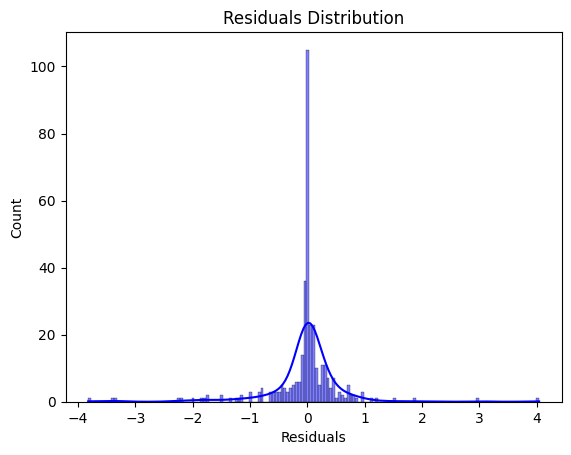

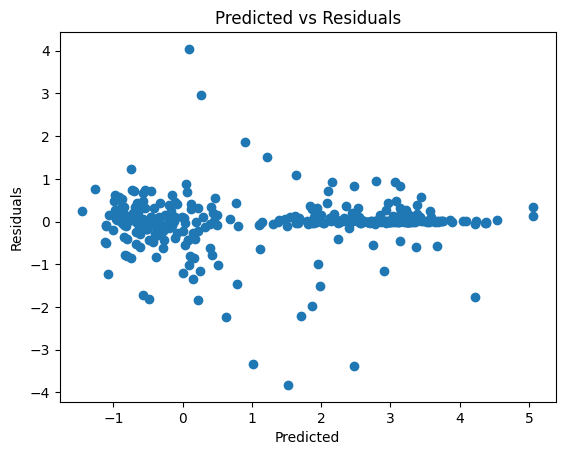

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

residuals = y_test - y_pred_rf
sns.histplot(residuals, kde=True, color='blue', palette='viridis', cbar=True )
plt.xlabel('Residuals')
plt.title('Residuals Distribution')
plt.show()

plt.scatter(y_pred_rf, residuals)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Predicted vs Residuals')
plt.show()

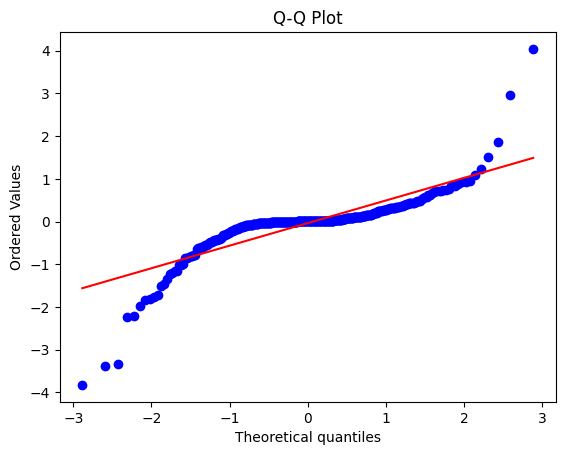

In [13]:
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

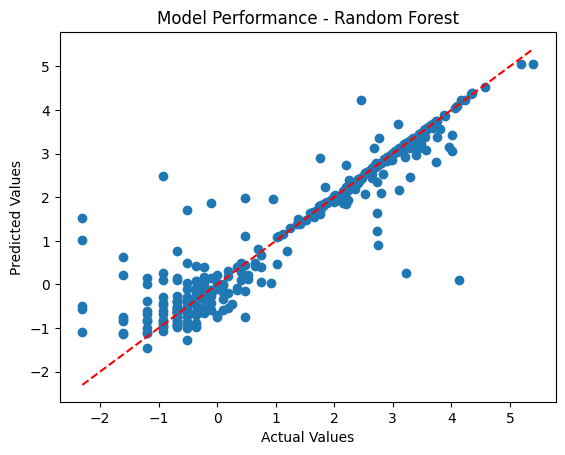

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

# Create a scatter plot
plt.scatter(y_test, y_pred_rf)

# Add labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Model Performance - Random Forest')

# Add a diagonal line for reference
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')

# Show the plot
plt.show()

### out-of-bag

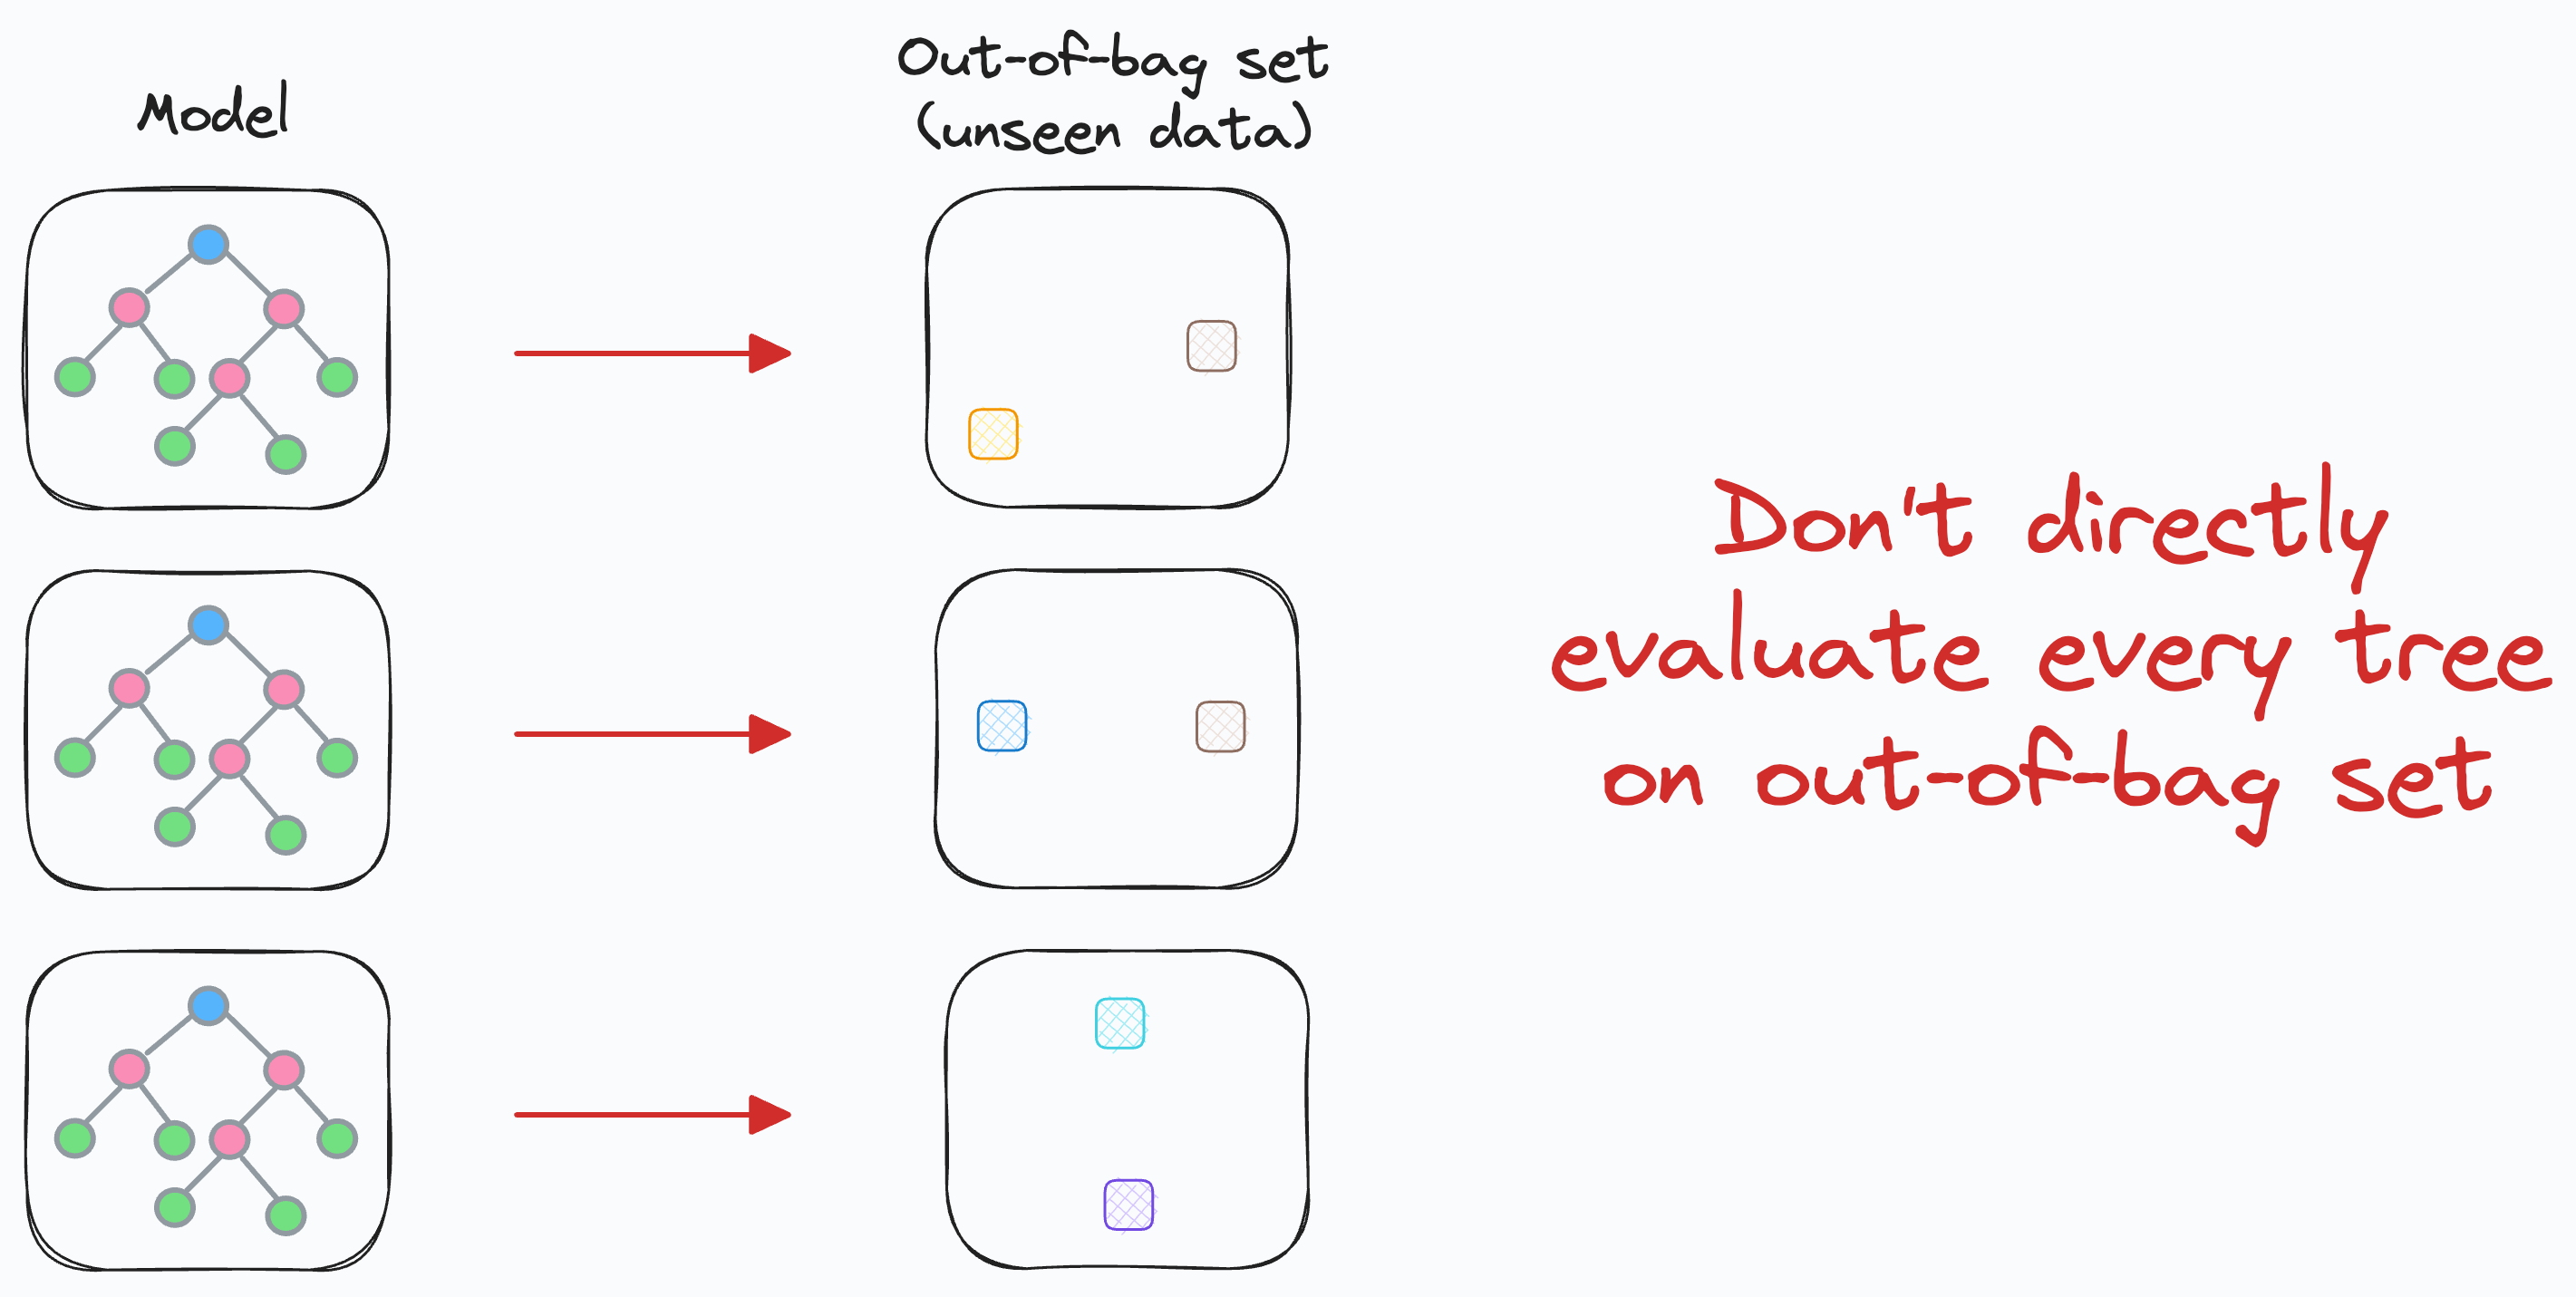 <style>img { max-width: 500px; }</style>

O out-of-bag score é uma métrica que mede a acurácia do modelo de Random Forest usando as amostras que não foram usadas para treinamento. Essas amostras são chamadas de out-of-bag samples e são usadas para avaliar o modelo sem a necessidade de um conjunto de validação separado. O out-of-bag score é uma estimativa da acurácia do modelo na população e é uma métrica útil para avaliar a capacidade de generalização do modelo. Quanto maior o out-of-bag score, melhor é a capacidade de generalização do modelo.

Em situações de poucos dados, a validação out-of-bag evita a divisão de dados enquanto obtém um bom proxy para validação do modelo.

In [67]:
oob_score = model_rf.oob_score_
print(f"Out-of-Bag Score: {oob_score}")

Out-of-Bag Score: 0.8704422099406749


In [68]:
importance = model_rf.feature_importances_
feature_names = X_train.columns

# Criar um dataframe com as features e suas importâncias
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})

# Ordenar as features pela importância em ordem decrescente
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Imprimir as features mais importantes
print(feature_importance_df)

                      Feature  Importance
5   Voyage Distance Travelled    0.569859
2                Time At Port    0.188561
4           Commercial Market    0.102130
0                  Berth Name    0.031366
12                     Length    0.025659
6        Voyage Speed Average    0.025365
10              Gross tonnage    0.021390
1               Terminal Name    0.017257
7               Year of build    0.005860
13                    Breadth    0.003222
9                        Flag    0.002888
11                 Deadweight    0.002317
8          Voyage Origin Port    0.002159
3       Vessel Type - Generic    0.001966


In [69]:
def verificar_valores_reais(y_test, y_pred_rf):    
    comparison_df = pd.DataFrame({
        'True Value': y_test,
        'Predicted Value': y_pred_rf,

    })

    # Display the first few rows of the DataFrame
    print(comparison_df.tail(15))

In [70]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

def model_performance(y_true, y_pred_rf):
    mse = mean_squared_error(y_true, y_pred_rf)
    rmse = sqrt(mse)
    r2 = r2_score(y_true, y_pred_rf)
    
    print("Mean Squared Error (MSE): ", mse)
    print("Root Mean Squared Error (RMSE): ", rmse)
    print("R-squared (R2 Score): ", r2)

In [71]:
verificar_valores_reais(y_test, y_pred_rf)
print("\n")
model_performance(y_test, y_pred_rf)

      True Value  Predicted Value
832     2.734368         2.702978
548    -0.693147        -0.495640
175     3.532226         3.370574
620    -0.356675        -0.619483
530     3.135494         3.129355
1088    3.456317         3.172723
999    -0.916291        -0.947720
834     0.182322         0.190131
1144    2.459589         4.261667
906    -1.203973        -1.473935
1263    2.727853         2.637219
198     3.529297         3.448449
15     -0.510826        -0.952010
265    -0.693147        -0.203647
538    -0.510826        -0.855779


Mean Squared Error (MSE):  0.38903413877229576
Root Mean Squared Error (RMSE):  0.623726012582685
R-squared (R2 Score):  0.880689318792742


In [72]:
#https://blog.dailydoseofds.com/p/statsmodel-regression-summary-will

import statsmodels.formula.api as smf
statsmodels = smf.ols('y ~ X', data=df_modelagem)
statsmodels = statsmodels.fit()
print(statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     274.8
Date:                Tue, 11 Jun 2024   Prob (F-statistic):               0.00
Time:                        00:21:32   Log-Likelihood:                -2552.4
No. Observations:                1769   AIC:                             5135.
Df Residuals:                    1754   BIC:                             5217.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -173.5655      8.152    -21.292      0.0